# **Task 1: Prediction using Supervised ML**
We will predict the percentage of a student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

# **Author: Syed Ehtesham**

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [6]:
#importing data
url = "/content/student_scores - student_scores.csv"
df = pd.read_csv(url)
print("Data imported successfully!")
df


Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
df.shape

(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Plotting the Scores**

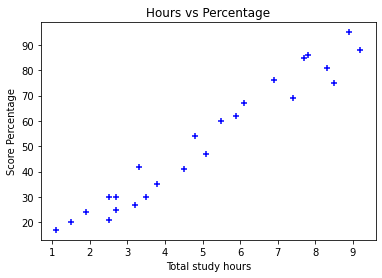

In [12]:
%matplotlib inline
plt.title("Hours vs Percentage")
plt.xlabel("Total study hours")
plt.ylabel("Score Percentage")
plt.scatter(df.Hours, df.Scores, color="blue", marker = "+")

# ***Prepare the Data***

In [25]:
#Place values of hours into x and values of scores into y
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#number of hours studied
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
#the score
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [27]:
#Split the dataset into train and test datasets using Scikit-learn's train_test_split()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [28]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [29]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [30]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [31]:
y_test

array([20, 27, 69, 30, 62])

# **Train the Machine Learining Model**

In [32]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training Complete!")

Training Complete!


# **Model Visualization**

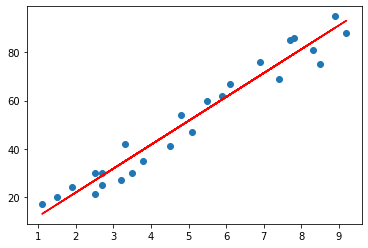

In [33]:
#Plotting the Regression Line
line = regressor.coef_*x+regressor.intercept_

#Plotting the test data
plt.scatter(x,y)
plt.plot(x, line, color = "Red")
plt.show()

# **Making the Predictions**

In [34]:
print(x_test) # Hours - testing data
y_pred = regressor.predict(x_test) #predict the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
#Comparing the predicted values with Actual ones
data = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
#What if a student studies 9.25 hrs/day?

hours = 9.25
my_pred = regressor.predict([[hours]])
print(f"No. of Hours = {hours}")
print(f"Predicted Score = {my_pred[0]}")

No. of Hours = 9.25
Predicted Score = 93.69173248737539


# **Evaluate the Model by calculating errors**

**Mean Absolute Error**

In [37]:
from sklearn import metrics

print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  4.183859899002982


**Mean Squared Error**

In [39]:
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  21.598769307217456


**Max Error**

In [40]:
print("Max Error: ", metrics.max_error(y_test, y_pred))

Max Error:  6.732260779489835
